In [2]:
import pandas as pd 
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Check which feature are useful for the model 

## All features and statistics

In [3]:
dir = Path("/DATA/Luis/thesis/scanline_classification/models/xgb_training/feature_importance/xgb_feat_importance_mean_statistics.csv")
df = pd.read_csv(dir)

In [4]:
for i, value in enumerate(df['statistics'].unique()):
    if i == 0:
        df_stat = df[df['statistics'] == value]
        basline_f1 = df_stat.iloc[0, 1]
        feature_importance = basline_f1 - df_stat['f1']
    else:
        df_stat = df[df['statistics'] == value]
        basline_f1 = df_stat.iloc[0, 1]
        feature_importance_temp = basline_f1 - df_stat['f1']
        feature_importance = pd.concat([feature_importance, feature_importance_temp], axis=0)
        
# rename feature_importance
feature_importance = feature_importance.rename('feature_importance')
df = pd.concat([df, feature_importance], axis=1)

0      0.0000
1     -0.0197
2     -0.0011
3     -0.0001
4     -0.0015
        ...  
148    0.0005
149   -0.0001
150   -0.0024
151   -0.0002
152    0.0033
Name: feature_importance, Length: 153, dtype: float64

In [23]:
order = df_mod.groupby('drop_col')['feature_importance'].mean().sort_values(ascending=False).index
order_dict = {value: i for i, value in enumerate(order)}
df['order'] = df['drop_col'].map(order_dict)
df = df.sort_values('order')
df = df.drop(columns='order')
df_mod = df[df['drop_col'] != 'none']

In [24]:
df

,accuracy,f1,n_estimators,max_depth,learning_rate,drop_col,statistics,feature_importance
109,0.6814,0.6744,200,4,0.1,vert_angle,perc25th,0.0833
58,0.6878,0.6843,200,4,0.1,vert_angle,median,0.0606
143,0.3674,0.3547,200,4,0.1,vert_angle,skewness,0.0201
92,0.6998,0.7004,200,4,0.1,vert_angle,perc98th,0.0659
24,0.4589,0.4642,200,4,0.1,vert_angle,var,-0.0009
...,...,...,...,...,...,...,...,...
68,0.7546,0.7599,200,4,0.1,none,perc2nd,0.0000
85,0.7622,0.7663,200,4,0.1,none,perc98th,0.0000
102,0.7527,0.7577,200,4,0.1,none,perc25th,0.0000
119,0.7690,0.7729,200,4,0.1,none,perc75th,0.0000


## Feature importances attributes taking all statistics into account

/tmp/ipykernel_1063979/3980732916.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


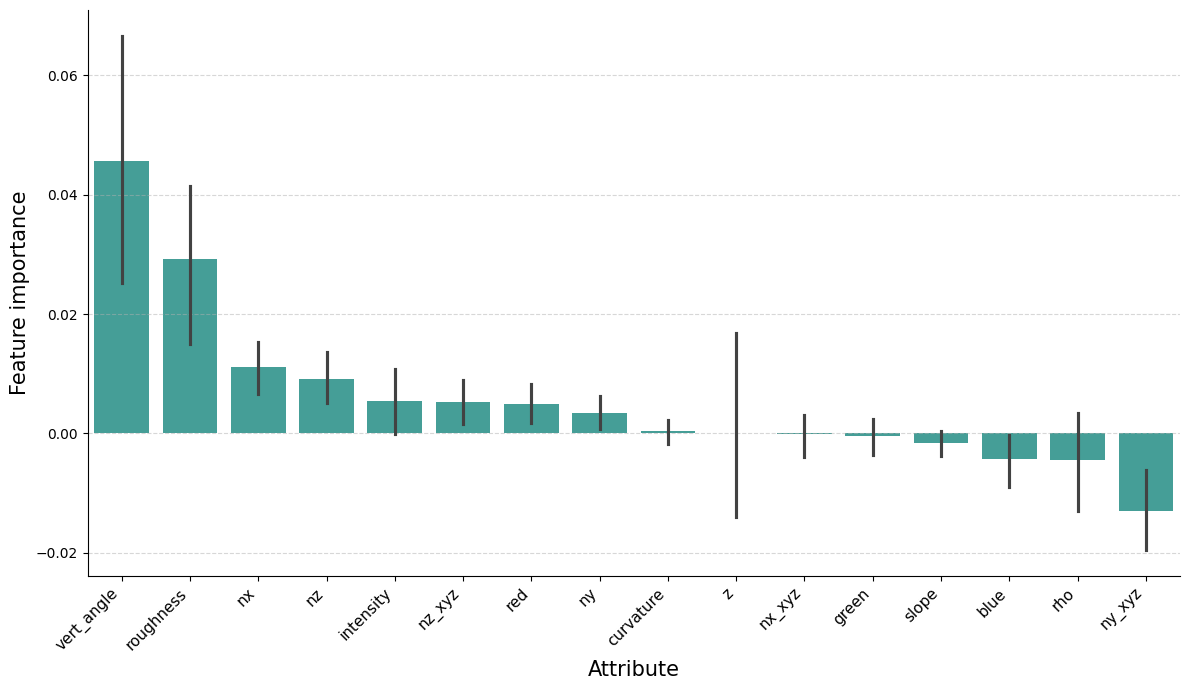

In [26]:
fig, ax1 = plt.subplots(figsize=(12, 7))

sns.barplot(x='drop_col', y='feature_importance', data=df_mod, color=sns.color_palette("husl", 4)[2], ax=ax1)
ax1.set_xlabel('Attribute', fontdict={'size': 15})
ax1.set_ylabel('Feature importance', fontdict={'size': 15})

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Set the size of the tick labels
ax1.tick_params(axis='x', labelsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add grid
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Feature importance depending on the underlying statistics

/tmp/ipykernel_1063979/3057504534.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


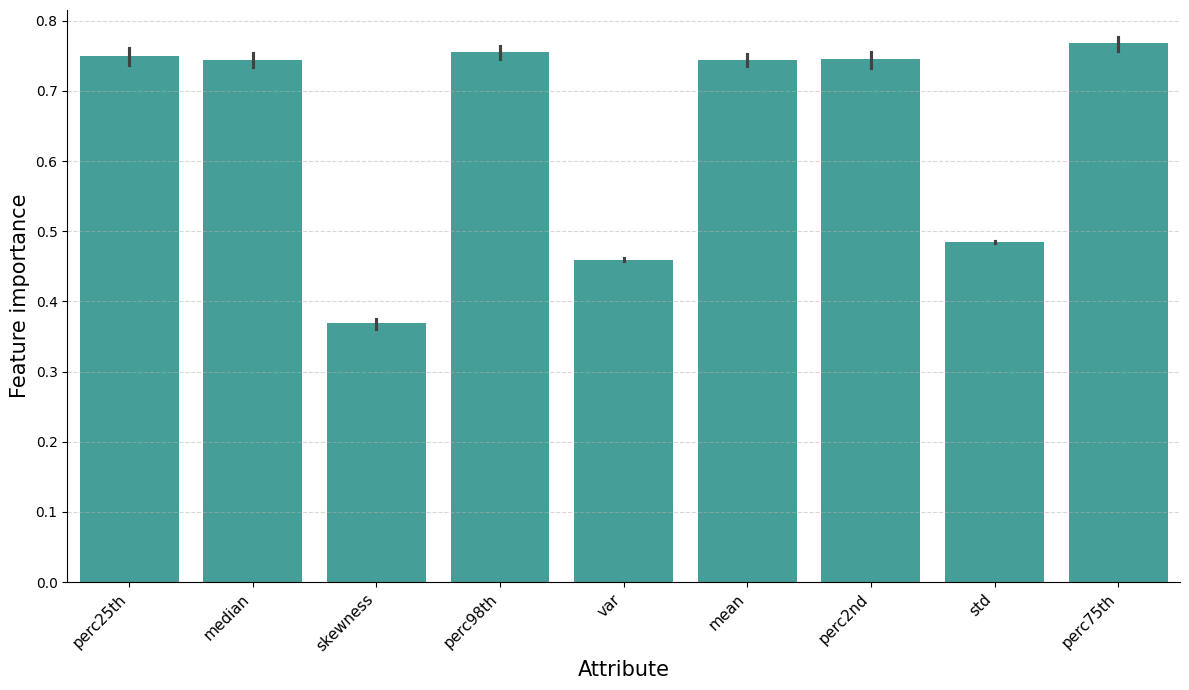

In [45]:
fig, ax1 = plt.subplots(figsize=(12, 7))

sns.barplot(x='statistics', y='f1', data=df_mod, color=sns.color_palette("husl", 4)[2], ax=ax1)
ax1.set_xlabel('Attribute', fontdict={'size': 15})
ax1.set_ylabel('Feature importance', fontdict={'size': 15})

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Set the size of the tick labels
ax1.tick_params(axis='x', labelsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add grid
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

/tmp/ipykernel_1063979/2861373678.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_1063979/2861373678.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_1063979/2861373678.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_1063979/2861373678.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_10639

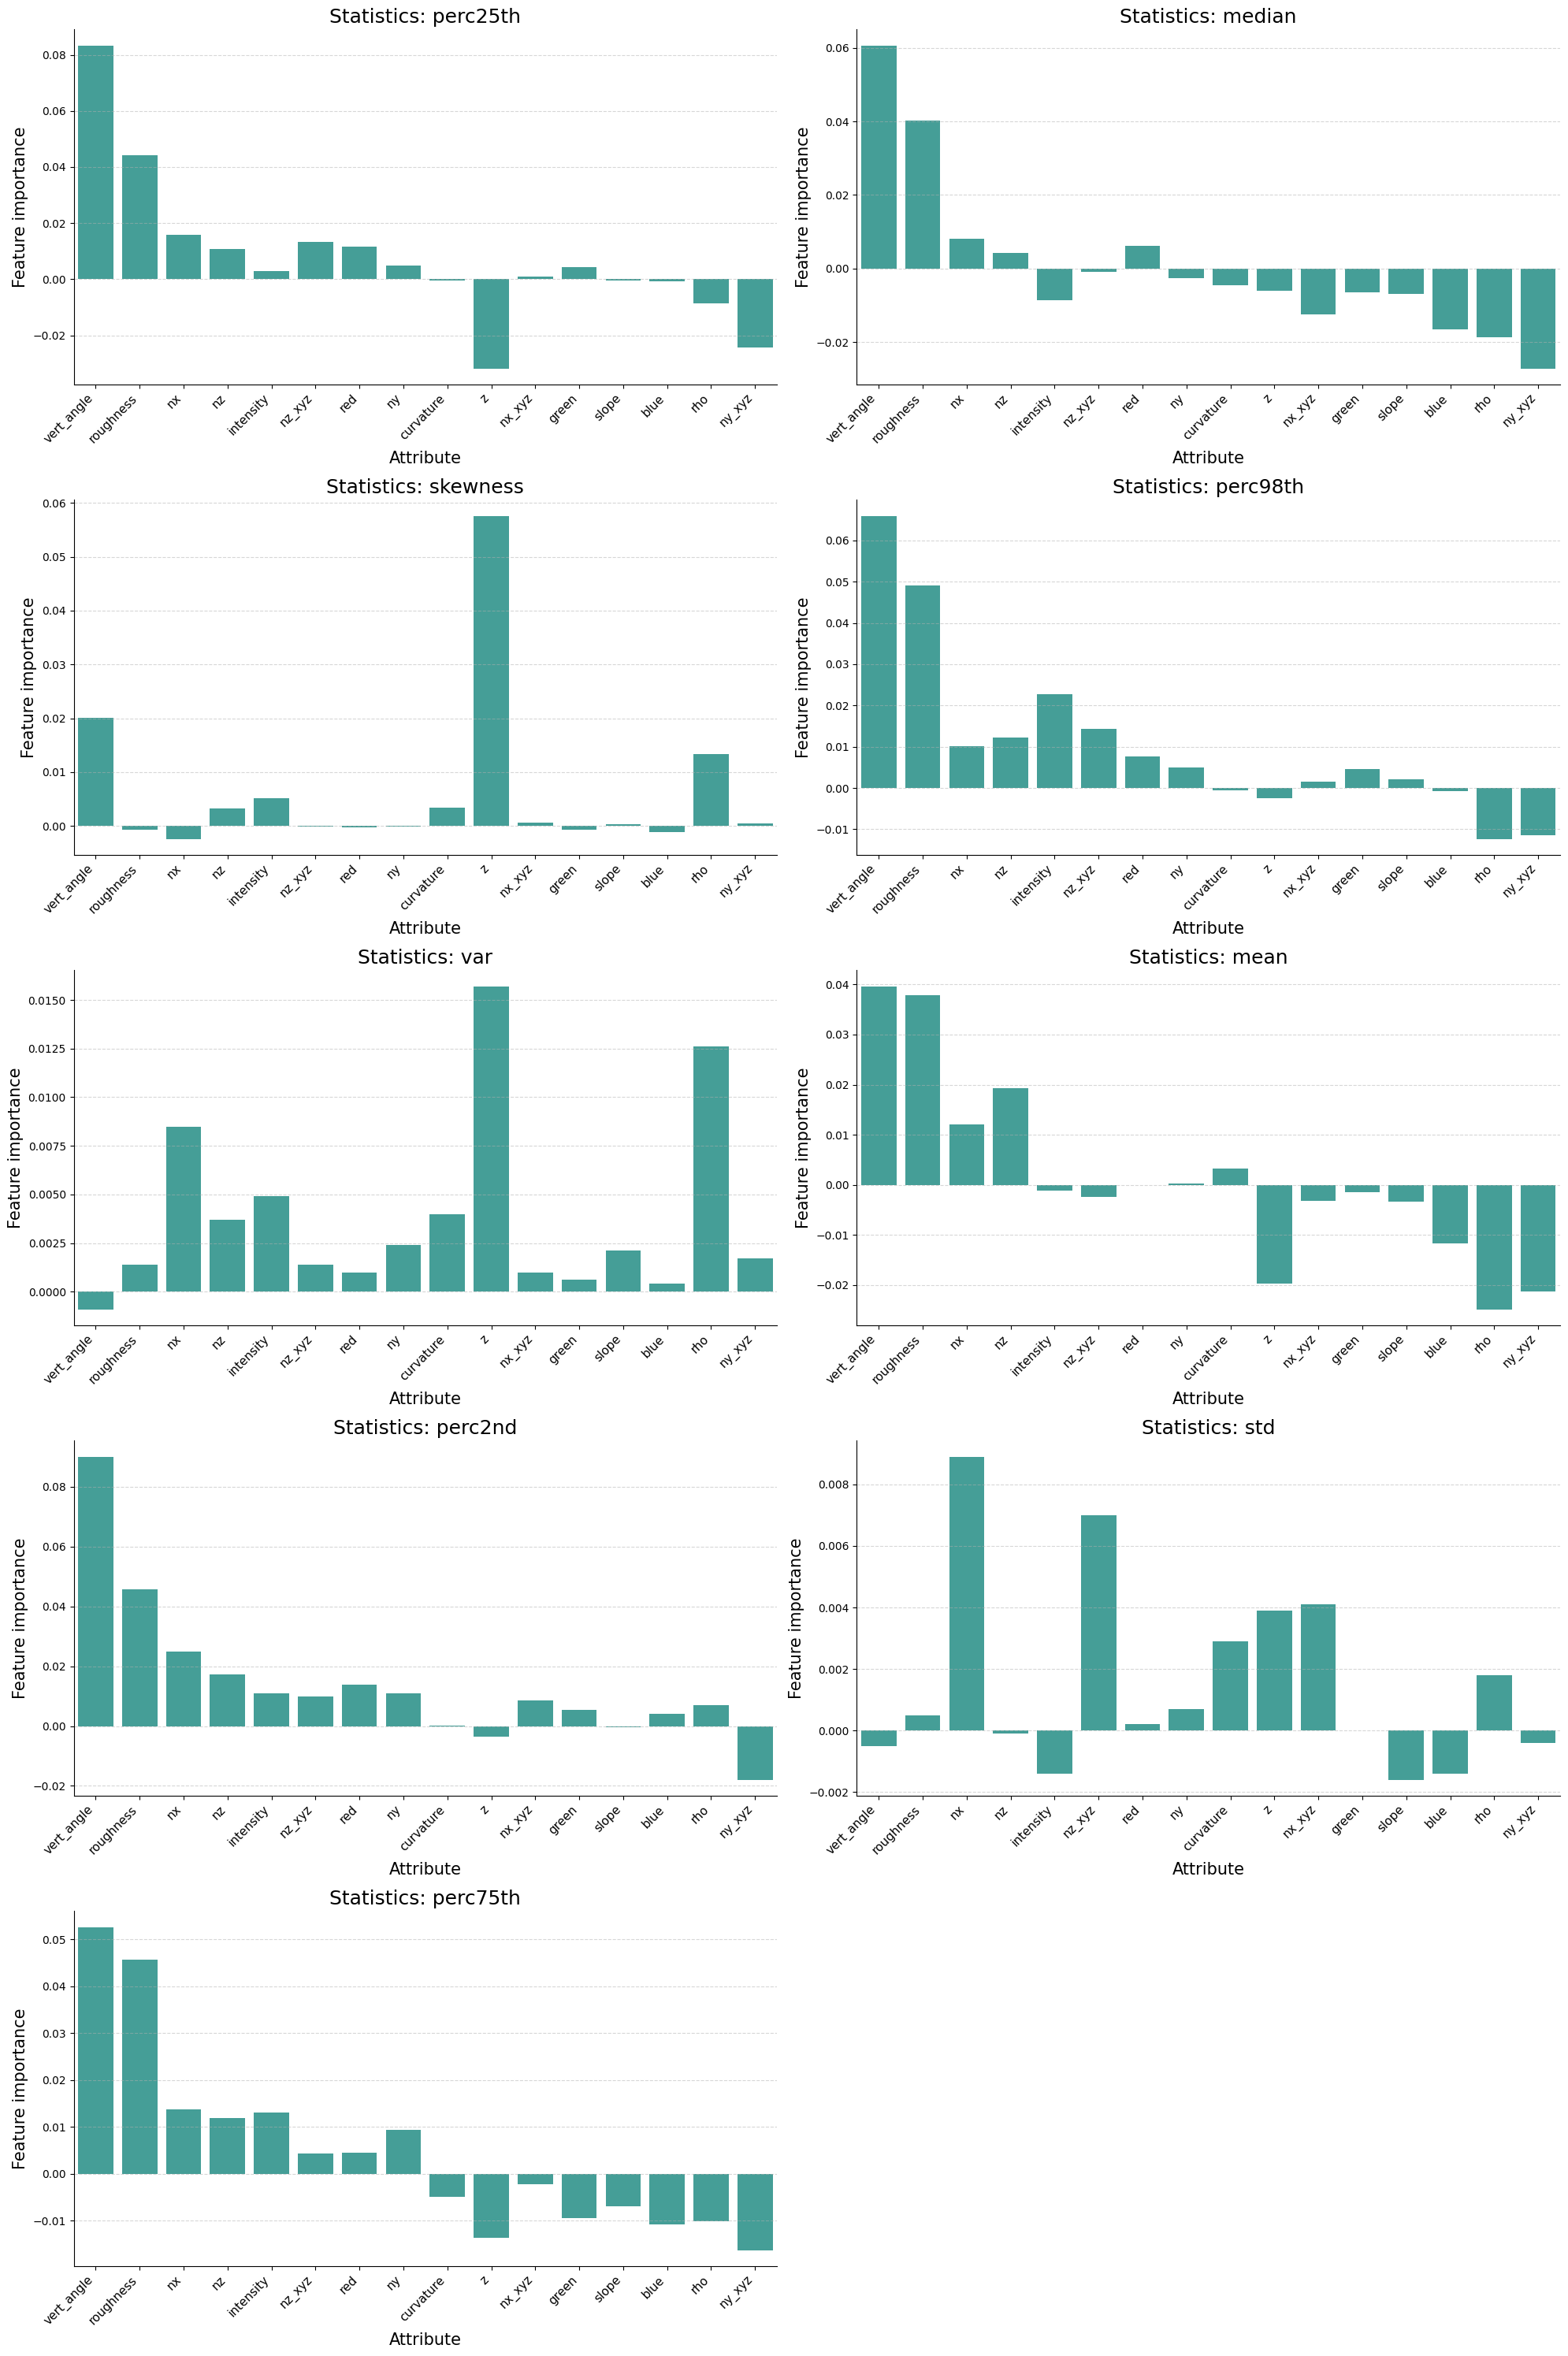

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get unique statistics
statistics = df_mod['statistics'].unique()

# Calculate number of rows and columns for subplots
n = len(statistics)
ncols = 2
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

fig, axs = plt.subplots(nrows, ncols, figsize=(10*ncols, 6*nrows))

# Flatten the axes array to easily iterate over it
axs = axs.flatten()

for i, stat in enumerate(statistics):
    # Subset the dataframe for the current statistic
    df_subset = df_mod[df_mod['statistics'] == stat]
    
    # Create a barplot for the current statistic
    sns.barplot(x='drop_col', y='feature_importance', data=df_subset, color=sns.color_palette("husl", 4)[2], ax=axs[i])
    
    # Set x and y labels
    axs[i].set_xlabel('Attribute', fontdict={'size': 15})
    axs[i].set_ylabel('Feature importance', fontdict={'size': 15})
    
    # Set title for the subplot
    axs[i].set_title(f'Statistics: {stat}', fontdict={'size': 18})

    # Remove top and right spines
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

    # Set the size of the tick labels
    axs[i].tick_params(axis='x', labelsize=11)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')

    # Add grid
    axs[i].grid(True, axis='y', linestyle='--', alpha=0.5)

# Remove extra subplots
if n < nrows * ncols:
    for ax in axs[n:]:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [44]:
pivot_table = df_mod.pivot_table(values='feature_importance', index='drop_col', columns='statistics')

row_sum = pivot_table.sum(axis=1)
col_sum = pivot_table.sum(axis=0)
pivot_table['Row_Sum'] = row_sum
pivot_table = pd.concat([pivot_table, pd.DataFrame(col_sum.rename('Col_Sum')).T])

pivot_table 

statistics,mean,median,perc25th,perc2nd,perc75th,perc98th,skewness,std,var,Row_Sum
blue,-0.0116,-0.0165,-0.0008,0.0042,-0.0109,-0.0008,-0.0012,-0.0014,0.0004,-3.860000e-02
curvature,0.0032,-0.0045,-0.0004,0.0002,-0.0050,-0.0006,0.0034,0.0029,0.0040,3.200000e-03
green,-0.0015,-0.0064,0.0044,0.0053,-0.0095,0.0045,-0.0007,0.0000,0.0006,-3.300000e-03
intensity,-0.0011,-0.0085,0.0029,0.0110,0.0131,0.0228,0.0052,-0.0014,0.0049,4.890000e-02
nx,0.0120,0.0081,0.0157,0.0248,0.0138,0.0101,-0.0024,0.0089,0.0085,9.950000e-02
nx_xyz,-0.0032,-0.0125,0.0008,0.0086,-0.0022,0.0016,0.0006,0.0041,0.0010,-1.200000e-03
ny,0.0002,-0.0025,0.0049,0.0110,0.0093,0.0050,-0.0002,0.0007,0.0024,3.080000e-02
ny_xyz,-0.0212,-0.0271,-0.0244,-0.0179,-0.0163,-0.0115,0.0005,-0.0004,0.0017,-1.166000e-01
nz,0.0193,0.0042,0.0107,0.0173,0.0118,0.0123,0.0033,-0.0001,0.0037,8.250000e-02
nz_xyz,-0.0024,-0.0008,0.0132,0.0098,0.0043,0.0143,-0.0001,0.0070,0.0014,4.670000e-02


## Correlation between features

In [46]:
pcd_path = "/DATA/Luis/thesis/scanline_classification/data/data_for_training_z_normalization/validation/merged/validation_data_merged_frac.csv"
pcd_df = pd.read_csv(pcd_path, sep=',')

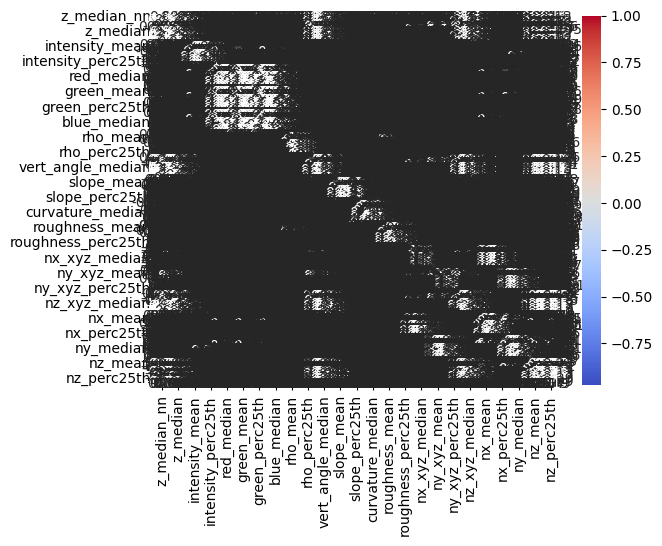

In [51]:
# Calculate pairwise correlation
correlation = pcd_df.iloc[:, :-2].corr()

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

In [52]:
correlation

,z_median_nn,z_perc2nd_nn,z_perc98th_nn,z_mean,z_var,z_std,z_median,z_perc2nd,z_perc98th,z_perc25th,...,ny_skewness,nz_mean,nz_var,nz_std,nz_median,nz_perc2nd,nz_perc98th,nz_perc25th,nz_perc75th,nz_skewness
z_median_nn,1.000000,0.993238,0.973576,0.996552,0.007072,0.089523,0.998728,0.993335,0.976094,0.996386,...,-0.016935,-0.531159,-0.045976,-0.040290,-0.523488,-0.460247,-0.501968,-0.507367,-0.523336,0.130883
z_perc2nd_nn,0.993238,1.000000,0.965311,0.993747,-0.030645,0.040071,0.993175,0.998925,0.968422,0.997415,...,-0.020367,-0.533435,-0.058954,-0.057947,-0.524935,-0.455284,-0.512096,-0.505804,-0.529043,0.129869
z_perc98th_nn,0.973576,0.965311,1.000000,0.984927,0.194391,0.280898,0.976260,0.966010,0.998436,0.969759,...,-0.013497,-0.511525,-0.021744,-0.002776,-0.502310,-0.459425,-0.470032,-0.495802,-0.496034,0.116341
z_mean,0.996552,0.993747,0.984927,1.000000,0.056670,0.134126,0.997859,0.993788,0.987076,0.996043,...,-0.017097,-0.530124,-0.042731,-0.034637,-0.521791,-0.461666,-0.499292,-0.507718,-0.520889,0.129031
z_var,0.007072,-0.030645,0.194391,0.056670,1.000000,0.904224,0.021831,-0.031694,0.188962,-0.019332,...,0.027908,0.034733,0.080652,0.125529,0.037626,-0.017628,0.078512,0.005630,0.062522,-0.015981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nz_perc2nd,-0.460247,-0.455284,-0.459425,-0.461666,-0.017628,-0.123868,-0.460342,-0.449762,-0.466081,-0.454650,...,-0.015564,0.898090,-0.357403,-0.395297,0.874792,1.000000,0.668318,0.947166,0.785552,-0.127724
nz_perc98th,-0.501968,-0.512096,-0.470032,-0.499292,0.078512,0.103260,-0.501351,-0.516745,-0.467031,-0.510936,...,0.032074,0.909309,0.360020,0.402088,0.885941,0.668318,1.000000,0.800247,0.956843,-0.174754
nz_perc25th,-0.507367,-0.505804,-0.495802,-0.507718,0.005630,-0.069392,-0.507582,-0.502555,-0.500810,-0.504917,...,-0.004285,0.972414,-0.191525,-0.190378,0.965680,0.947166,0.800247,1.000000,0.898860,-0.294487
nz_perc75th,-0.523336,-0.529043,-0.496034,-0.520889,0.062522,0.048726,-0.522702,-0.530733,-0.496170,-0.528545,...,0.015314,0.971863,0.197391,0.216227,0.963410,0.785552,0.956843,0.898860,1.000000,-0.293290


# Check which feature are useful for the model: full resolution data 

In [1]:
import pandas as pd 
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [33]:
dir = Path("/DATA/Luis/thesis/scanline_classification/data/data_for_training_final_SM2CT20NM3_v02/classification_training_sample10000/all_results/feature_importance_results_full_res.csv")
df = pd.read_csv(dir)

df['feature_importance'] = -999.0
classes = ['unclassified', 'man-made objects', 'ground', 'tree trunk/branches', 'leaves', 'low vegetation']
stats = df['statistics'].unique()
filenames = df['filename'].unique()

In [34]:
metric = 'precision'

for filename in filenames:
    for stat in stats:
        for cl in classes:
            df_subset = df[(df['filename'] == filename) & (df['statistics'] == stat) & (df['attribute'] == cl)]
            baseline_f1 = df_subset[df_subset['baseline_model'] == 1][metric].values[0]
            feature_importance = baseline_f1 - df_subset[metric]
            df.loc[df_subset.index, 'feature_importance'] = feature_importance

In [35]:
df_analysis = df[df['feature_importance'] != -999.0]

In [36]:
order = df_analysis.groupby('drop_col')['feature_importance'].mean().sort_values(ascending=False).index
order_dict = {value: i for i, value in enumerate(order)}
df_analysis['order'] = df_analysis['drop_col'].map(order_dict)
df_analysis = df_analysis.sort_values('order')
df_analysis = df_analysis.drop(columns='order')
df_analysis = df_analysis[df_analysis['drop_col'] != 'none']

## Overall result feature importance of attributes

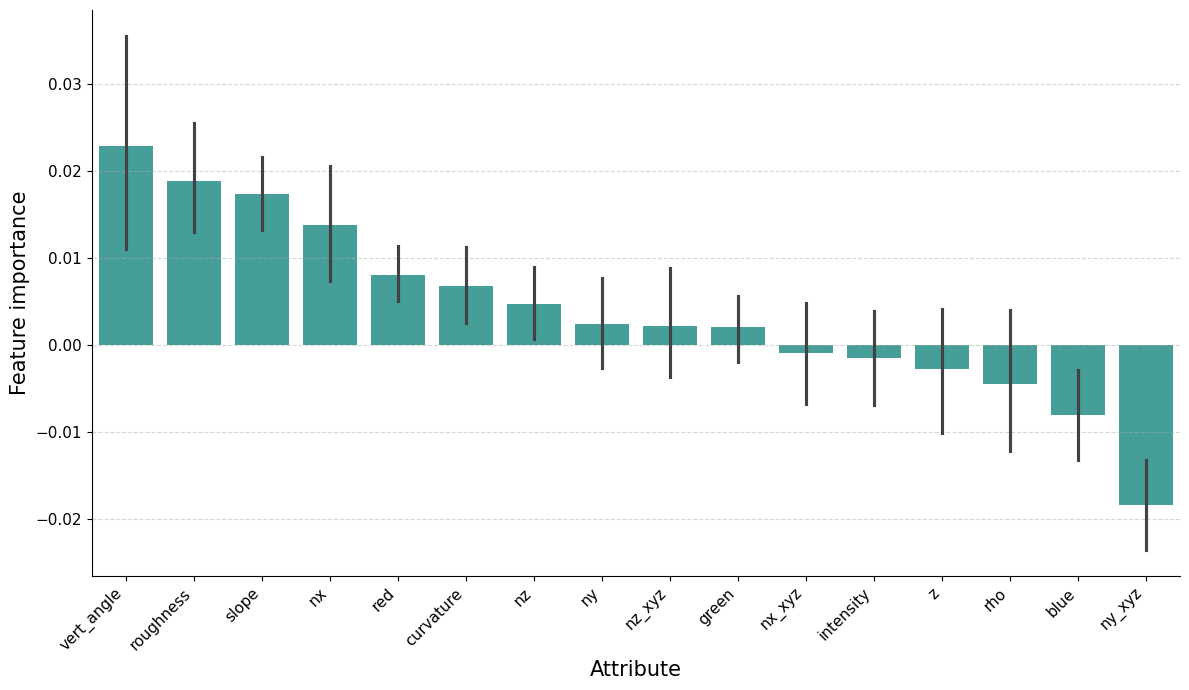

In [37]:
fig, ax1 = plt.subplots(figsize=(12, 7)) 

sns.barplot(x='drop_col', y='feature_importance', data=df_analysis, color=sns.color_palette("husl", 4)[2], ax=ax1)
ax1.set_xlabel('Attribute', fontdict={'size': 15})
ax1.set_ylabel('Feature importance', fontdict={'size': 15})

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Set the size of the tick labels
ax1.tick_params(axis='y', labelsize=11)
ax1.tick_params(axis='x', labelsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add grid
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Feature importance results for each class

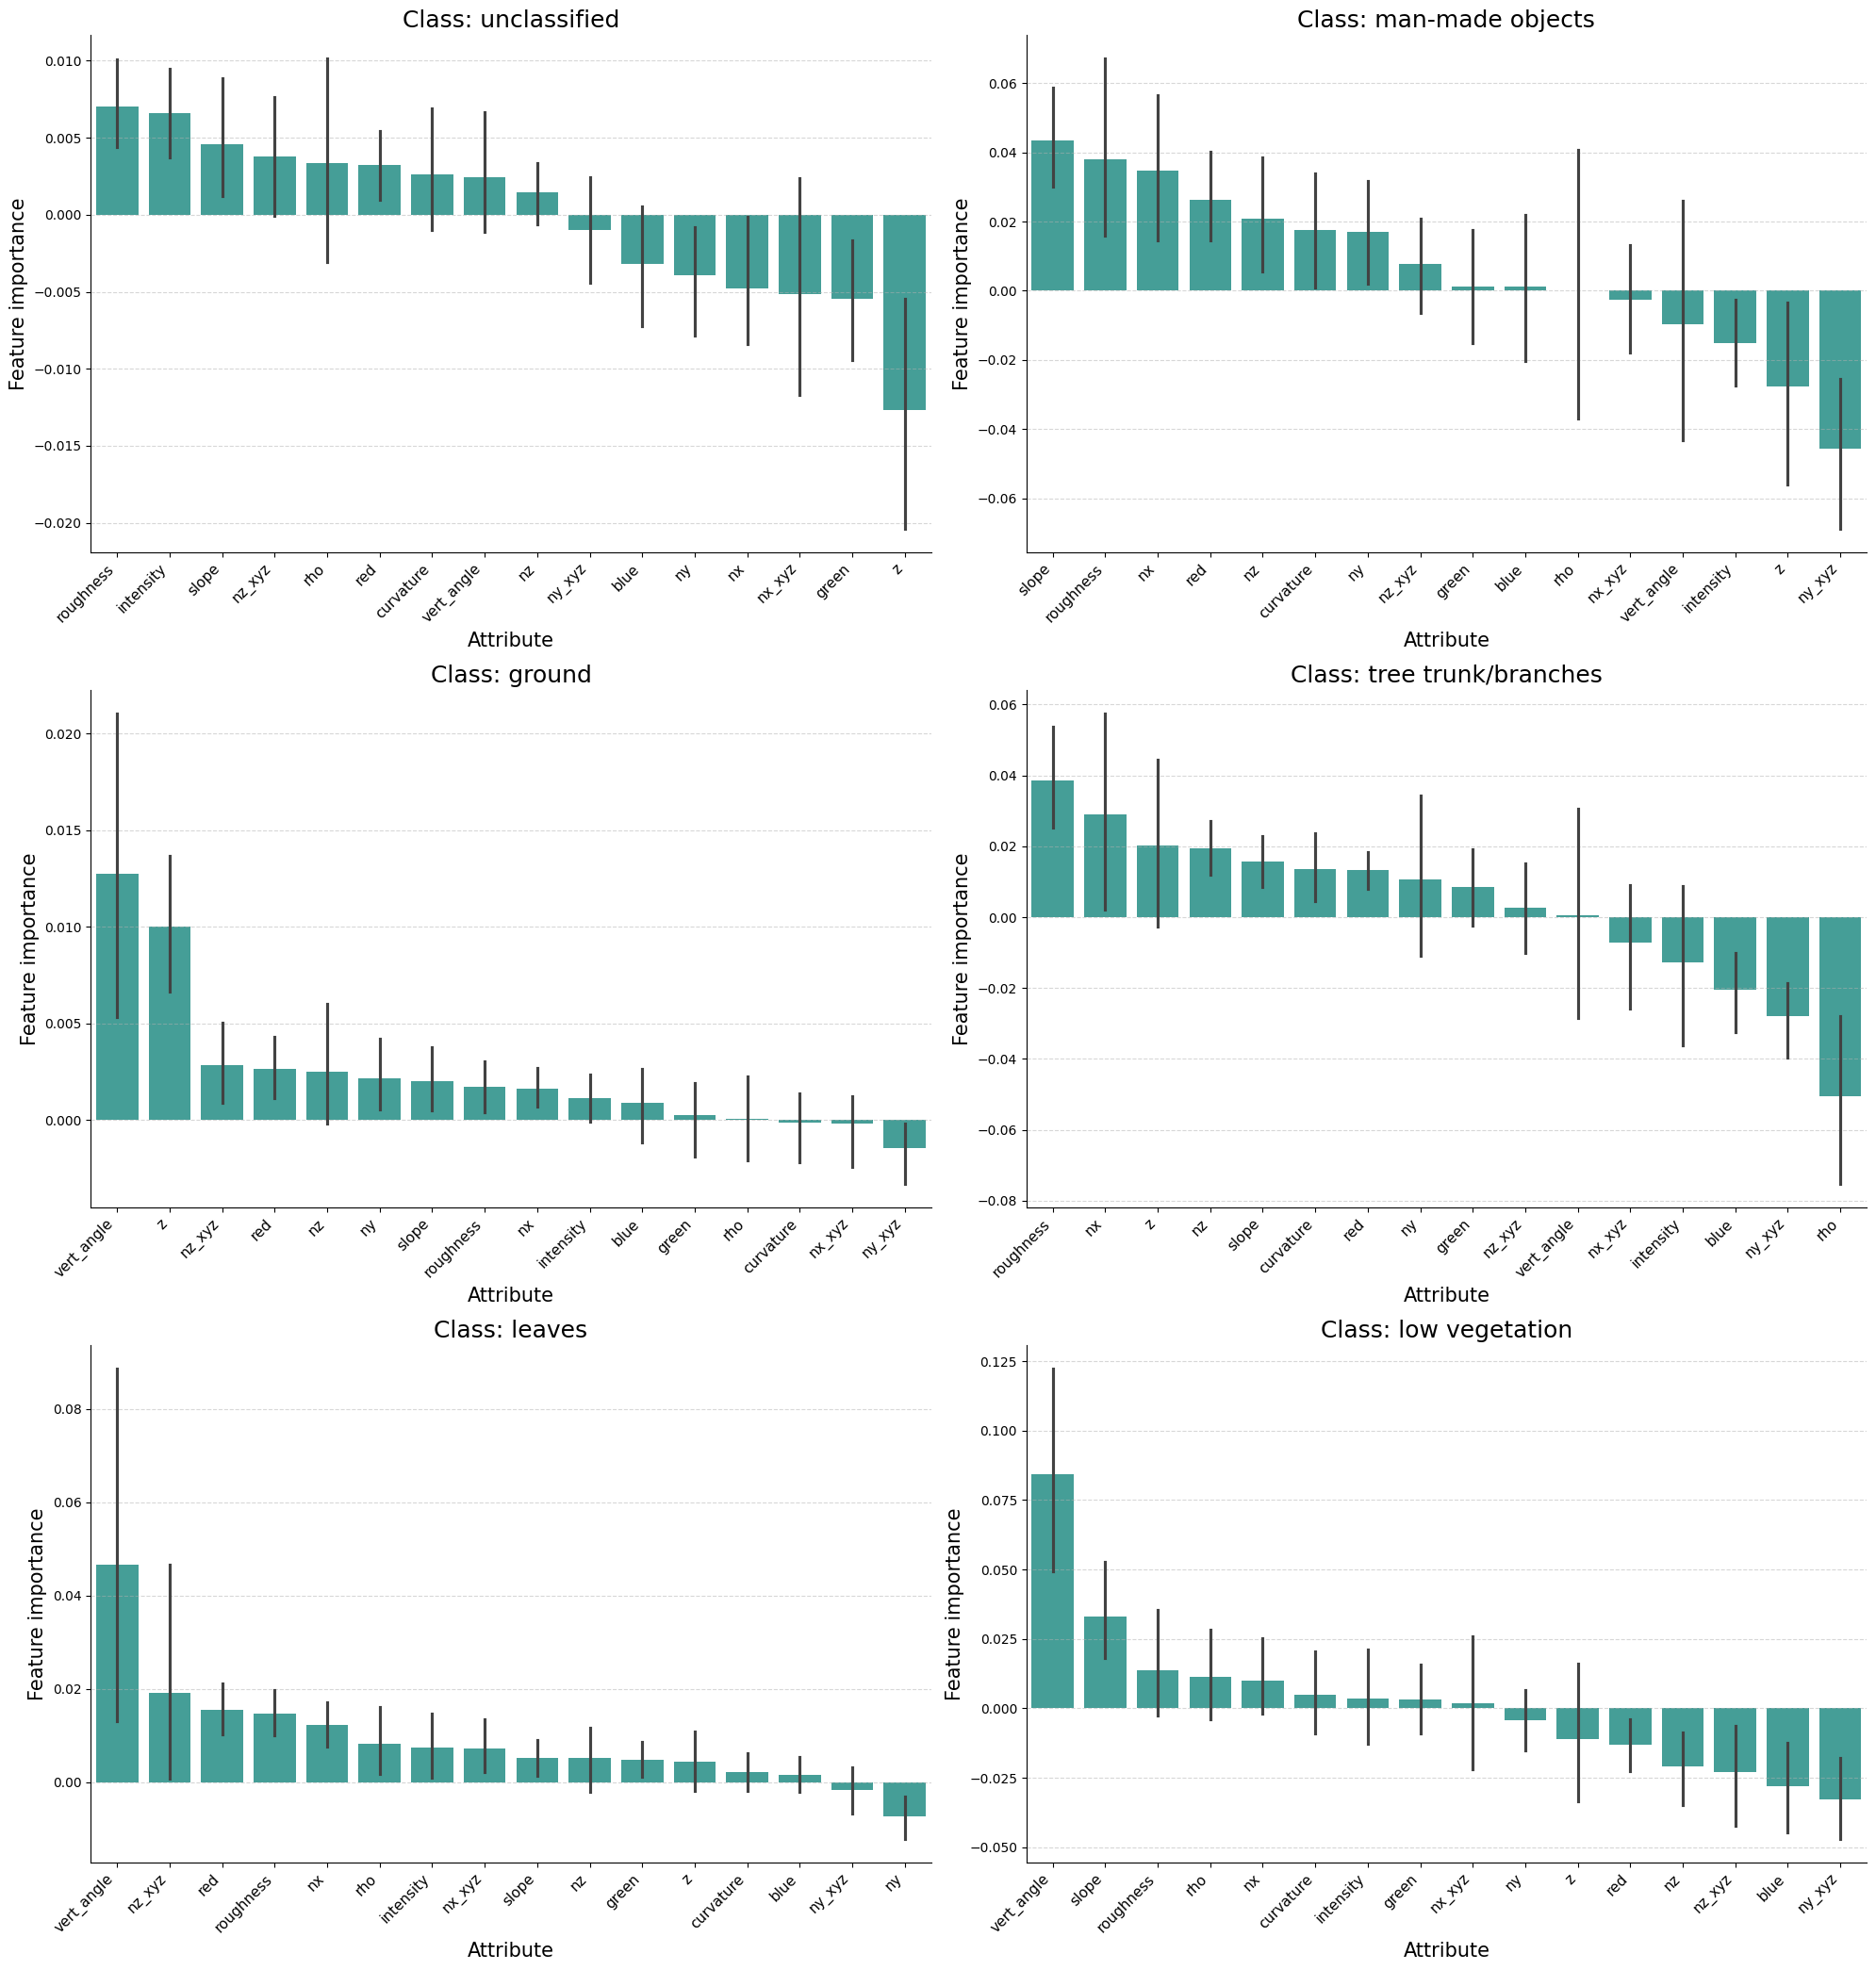

In [38]:
# Get unique statistics
cl = df_analysis['attribute'].unique()

# Calculate number of rows and columns for subplots
n = len(cl)
ncols = 2
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

fig, axs = plt.subplots(nrows, ncols, figsize=(10*ncols, 7*nrows))

# Flatten the axes array to easily iterate over it
axs = axs.flatten()

for i, class_name in enumerate(cl):
    # Subset the dataframe for the current statistic
    df_subset = df_analysis[df_analysis['attribute'] == class_name]
    
    order = df_subset.groupby('drop_col')['feature_importance'].mean().sort_values(ascending=False).index
    order_dict = {value: i for i, value in enumerate(order)}
    df_subset['order'] = df_subset['drop_col'].map(order_dict)
    df_subset = df_subset.sort_values('order')
    df_subset = df_subset.drop(columns='order')
    df_subset = df_subset[df_subset['drop_col'] != 'none']
    
    # Create a barplot for the current statistic
    sns.barplot(x='drop_col', y='feature_importance', data=df_subset, color=sns.color_palette("husl", 4)[2], ax=axs[i])
    
    # Set x and y labels
    axs[i].set_xlabel('Attribute', fontdict={'size': 15})
    axs[i].set_ylabel('Feature importance', fontdict={'size': 15})
    
    # Set title for the subplot
    axs[i].set_title(f'Class: {class_name}', fontdict={'size': 18})

    # Remove top and right spines
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

    # Set the size of the tick labels
    axs[i].tick_params(axis='x', labelsize=11)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')

    # Add grid
    axs[i].grid(True, axis='y', linestyle='--', alpha=0.5)

# Remove extra subplots
if n < nrows * ncols:
    for ax in axs[n:]:
        fig.delaxes(ax)


plt.tight_layout()
plt.show()

## Feature importance of statistics

In [27]:
dir = Path("/DATA/Luis/thesis/scanline_classification/data/data_for_training_final_SM2CT20NM3_v02/feature_importance_stats/all_results/cls_results_fr.csv")
df = pd.read_csv(dir)

df['feature_importance'] = -999.0
classes = ['unclassified', 'man-made objects', 'ground', 'tree trunk/branches', 'leaves', 'low vegetation']
stats = df['drop_statistics'].unique()
columns = df['column'].unique()
filenames = df['filename'].unique()

# Rename the first column
df = df.rename(columns={'Unnamed: 0': 'attribute'})

In [28]:
metric = 'precision'

for filename in filenames:
    for col in columns:
        for cl in classes:
            df_subset = df[(df['filename'] == filename) & (df['column'] == col) & (df['attribute'] == cl)]
            baseline_f1 = df_subset[df_subset['baseline_model'] == 1][metric].values[0]
            feature_importance = baseline_f1 - df_subset[metric]
            df.loc[df_subset.index, 'feature_importance'] = feature_importance

In [29]:
df_analysis = df[df['feature_importance'] != -999.0]

In [30]:
order = df_analysis.groupby('drop_statistics')['feature_importance'].mean().sort_values(ascending=False).index
order_dict = {value: i for i, value in enumerate(order)}
df_analysis['order'] = df_analysis['drop_statistics'].map(order_dict)
df_analysis = df_analysis.sort_values('order')
df_analysis = df_analysis.drop(columns='order')
df_analysis = df_analysis[df_analysis['drop_statistics'] != 'none']

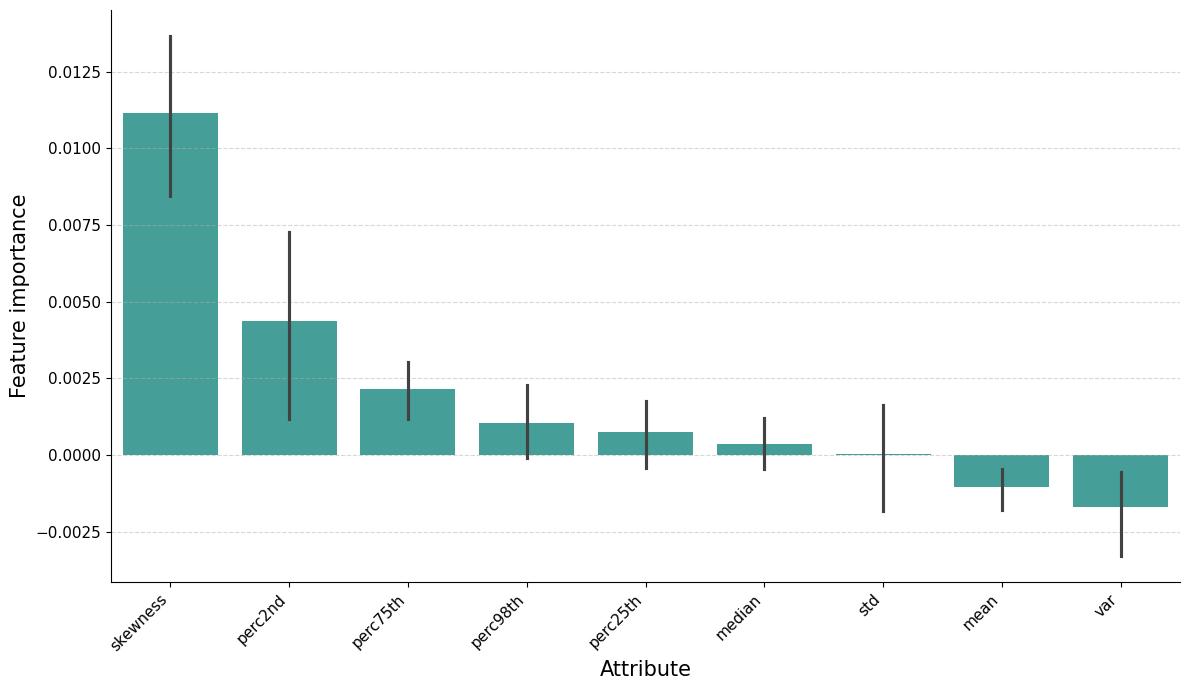

In [31]:
fig, ax1 = plt.subplots(figsize=(12, 7)) 

sns.barplot(x='drop_statistics', y='feature_importance', data=df_analysis, color=sns.color_palette("husl", 4)[2], ax=ax1)
ax1.set_xlabel('Attribute', fontdict={'size': 15})
ax1.set_ylabel('Feature importance', fontdict={'size': 15})

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Set the size of the tick labels
ax1.tick_params(axis='y', labelsize=11)
ax1.tick_params(axis='x', labelsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add grid
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

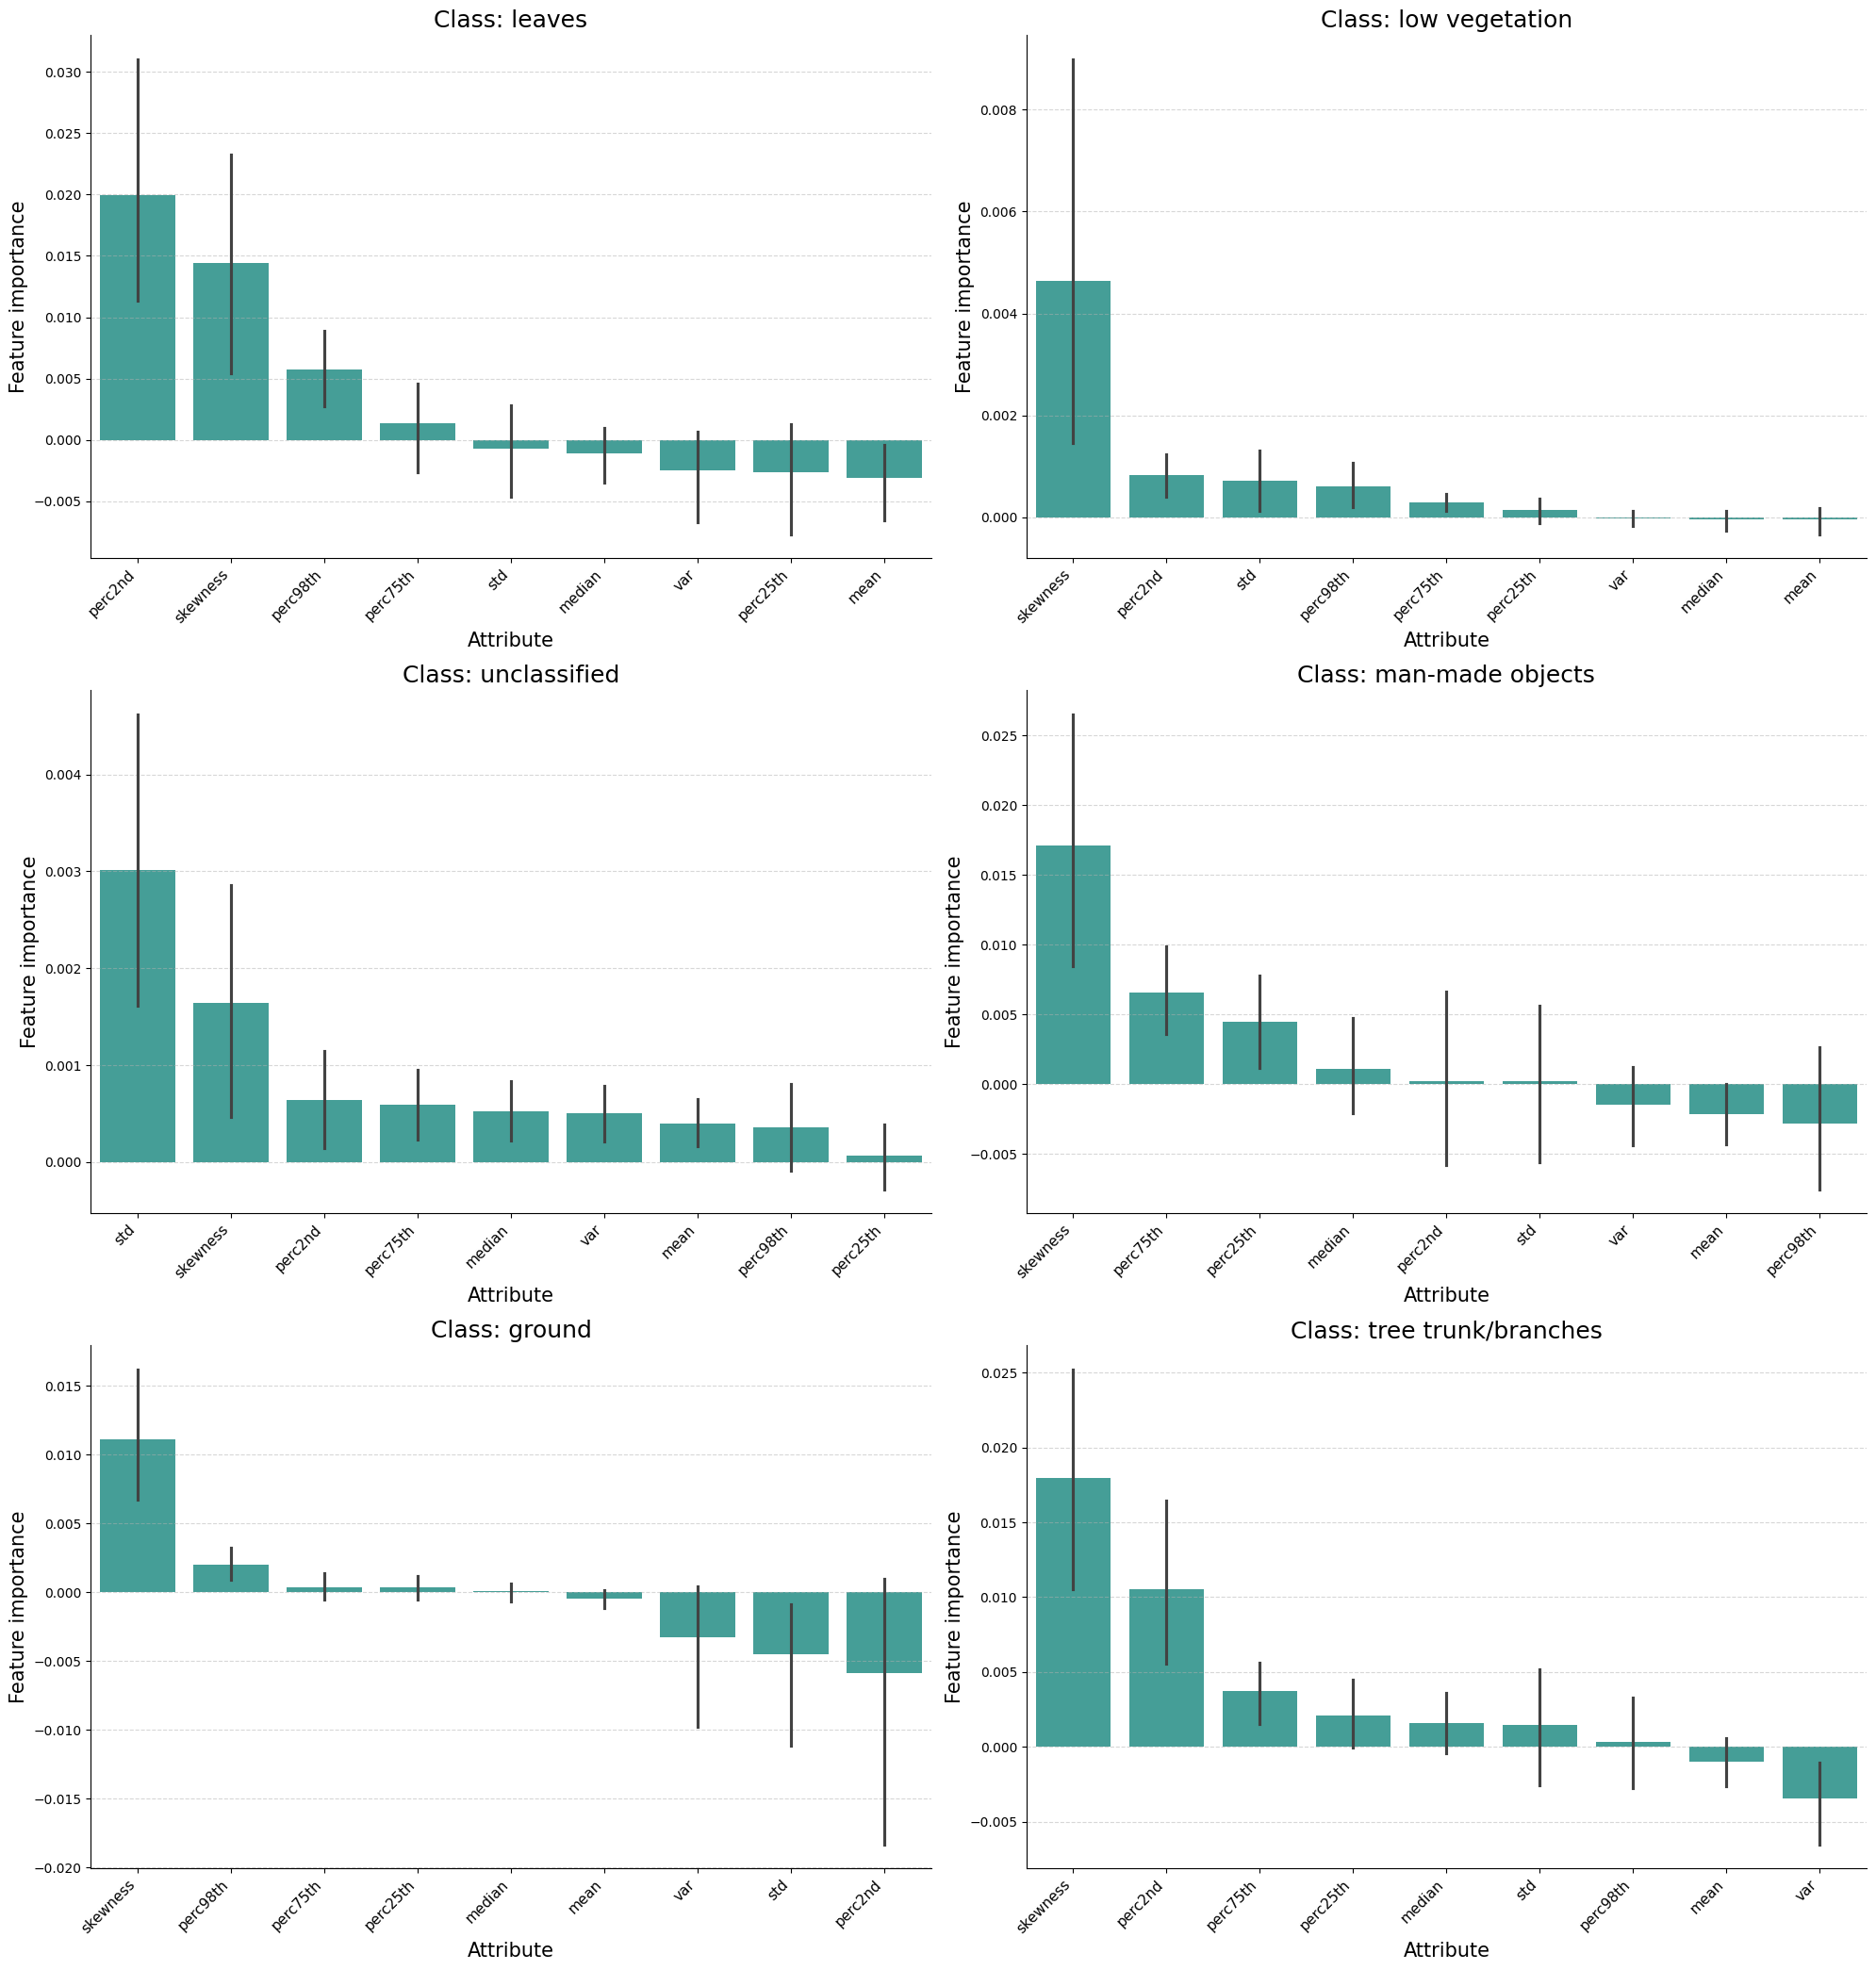

In [32]:
# Get unique statistics
cl = df_analysis['attribute'].unique()

# Calculate number of rows and columns for subplots
n = len(cl)
ncols = 2
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

fig, axs = plt.subplots(nrows, ncols, figsize=(10*ncols, 7*nrows))

# Flatten the axes array to easily iterate over it
axs = axs.flatten()

for i, class_name in enumerate(cl):
    # Subset the dataframe for the current statistic
    df_subset = df_analysis[df_analysis['attribute'] == class_name]
    
    order = df_subset.groupby('drop_statistics')['feature_importance'].mean().sort_values(ascending=False).index
    order_dict = {value: i for i, value in enumerate(order)}
    df_subset['order'] = df_subset['drop_statistics'].map(order_dict)
    df_subset = df_subset.sort_values('order')
    df_subset = df_subset.drop(columns='order')
    df_subset = df_subset[df_subset['drop_statistics'] != 'none']
    
    # Create a barplot for the current statistic
    sns.barplot(x='drop_statistics', y='feature_importance', data=df_subset, color=sns.color_palette("husl", 4)[2], ax=axs[i])
    
    # Set x and y labels
    axs[i].set_xlabel('Attribute', fontdict={'size': 15})
    axs[i].set_ylabel('Feature importance', fontdict={'size': 15})
    
    # Set title for the subplot
    axs[i].set_title(f'Class: {class_name}', fontdict={'size': 18})

    # Remove top and right spines
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

    # Set the size of the tick labels
    axs[i].tick_params(axis='x', labelsize=11)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')

    # Add grid
    axs[i].grid(True, axis='y', linestyle='--', alpha=0.5)

# Remove extra subplots
if n < nrows * ncols:
    for ax in axs[n:]:
        fig.delaxes(ax)


plt.tight_layout()
plt.show()

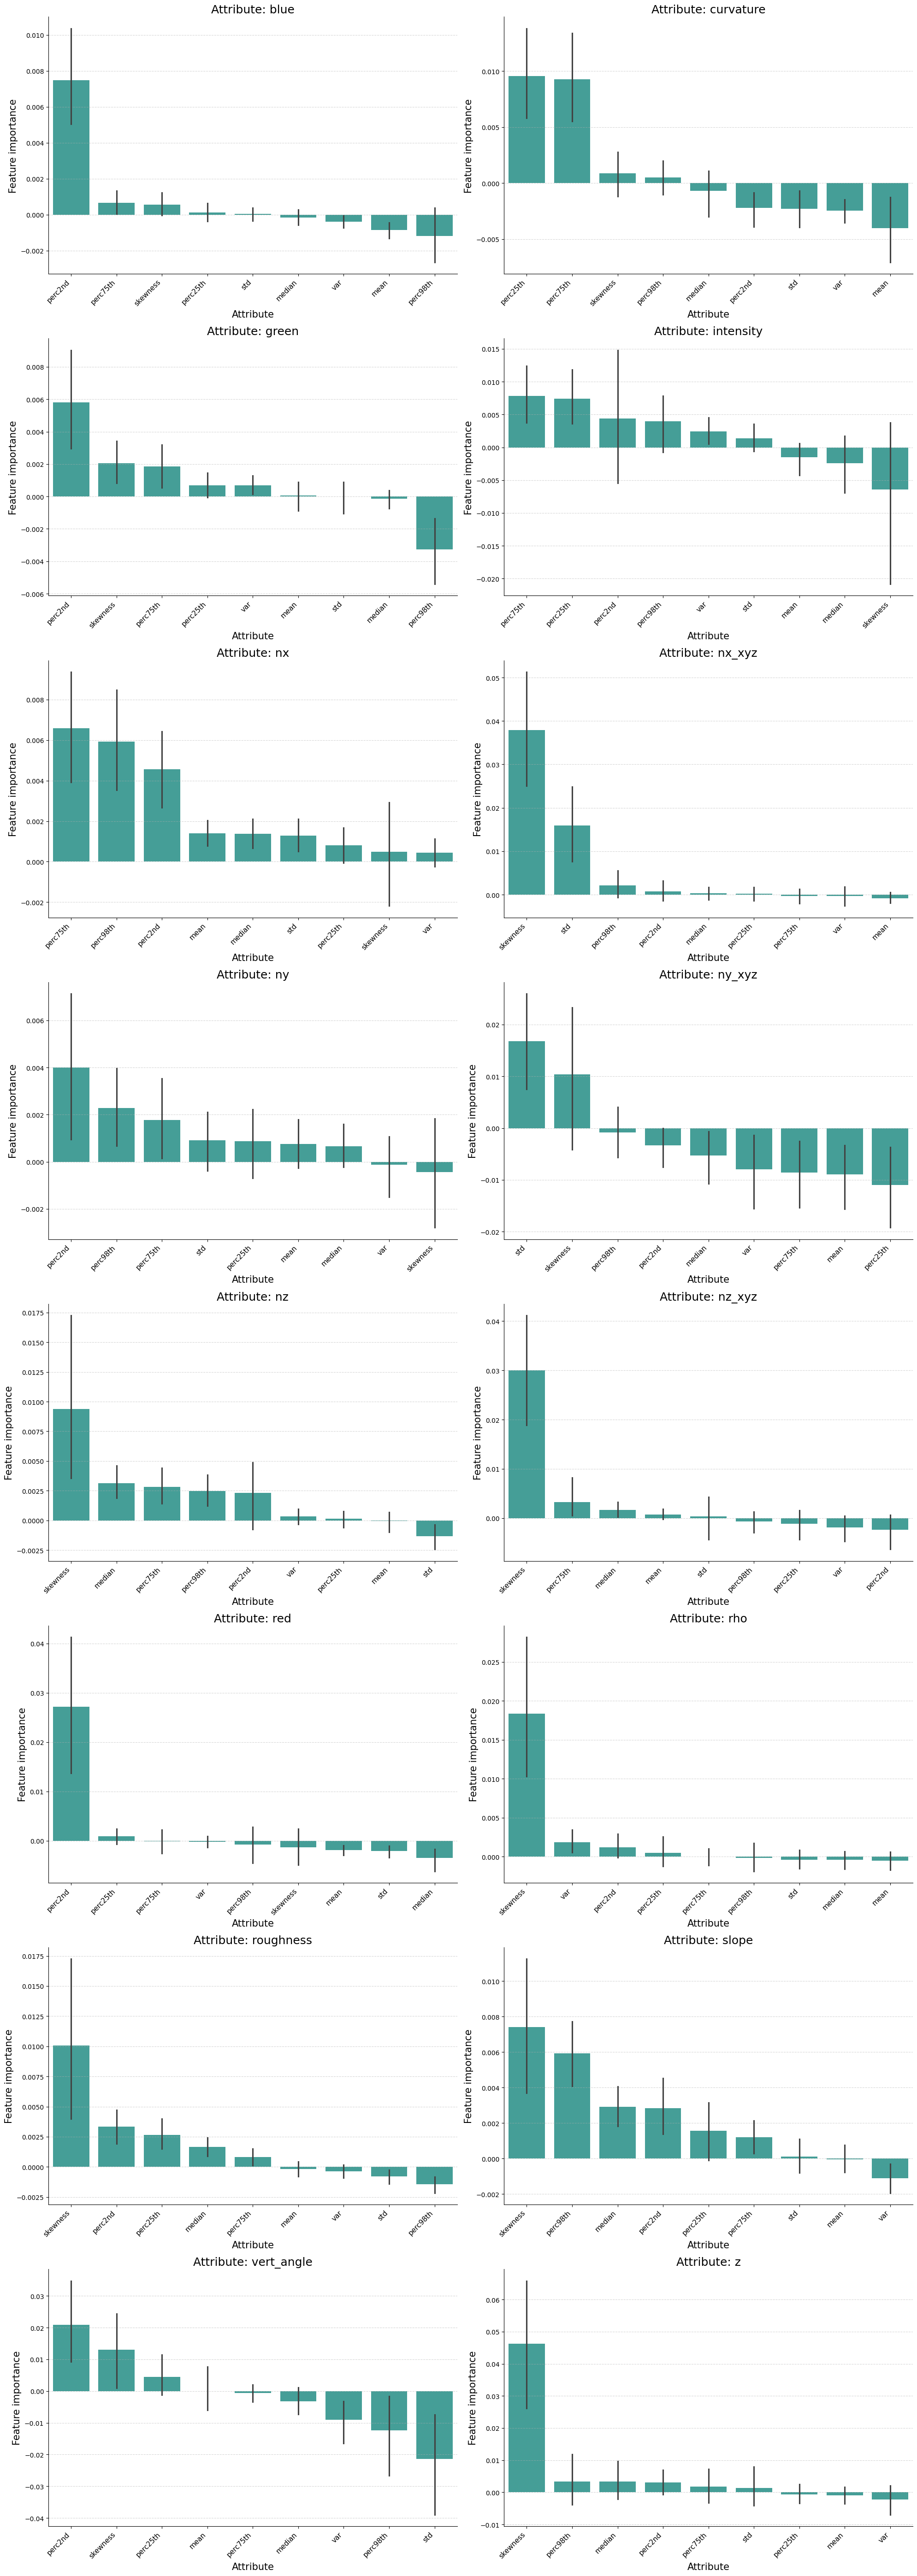

In [25]:
# Get unique statistics
cl = df_analysis['column'].unique()

# Calculate number of rows and columns for subplots
n = len(cl)
ncols = 2
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

fig, axs = plt.subplots(nrows, ncols, figsize=(10*ncols, 7*nrows))

# Flatten the axes array to easily iterate over it
axs = axs.flatten()

for i, col_name in enumerate(sorted(cl)):
    # Subset the dataframe for the current statistic
    df_subset = df_analysis[df_analysis['column'] == col_name]
    
    order = df_subset.groupby('drop_statistics')['feature_importance'].mean().sort_values(ascending=False).index
    order_dict = {value: i for i, value in enumerate(order)}
    df_subset['order'] = df_subset['drop_statistics'].map(order_dict)
    df_subset = df_subset.sort_values('order')
    df_subset = df_subset.drop(columns='order')
    df_subset = df_subset[df_subset['drop_statistics'] != 'none']
    
    # Create a barplot for the current statistic
    sns.barplot(x='drop_statistics', y='feature_importance', data=df_subset, color=sns.color_palette("husl", 4)[2], ax=axs[i])
    
    # Set x and y labels
    axs[i].set_xlabel('Attribute', fontdict={'size': 15})
    axs[i].set_ylabel('Feature importance', fontdict={'size': 15})
    
    # Set title for the subplot
    axs[i].set_title(f'Attribute: {col_name}', fontdict={'size': 18})

    # Remove top and right spines
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

    # Set the size of the tick labels
    axs[i].tick_params(axis='x', labelsize=11)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')

    # Add grid
    axs[i].grid(True, axis='y', linestyle='--', alpha=0.5)

# Remove extra subplots
if n < nrows * ncols:
    for ax in axs[n:]:
        fig.delaxes(ax)


plt.tight_layout()
plt.show()